# Visualization of Affinity Propagation and Agglomerative Clustering Results

This notebook focuses on visualizing and analyzing the results of clustering tweets using Affinity Propagation (AP) and Agglomerative Clustering (AC). The analysis includes dimensionality reduction, sentiment analysis, and clustering distribution visualization.

## 1. Importing Necessary Libraries
- Libraries for data manipulation (`pandas`), visualization (`matplotlib`, `seaborn`), and clustering (`AffinityPropagation`, `AgglomerativeClustering`) are imported.
- `nltk` is used for sentiment analysis, and the `vader_lexicon` is downloaded for sentiment scoring.

## 2. Loading Data and Cluster Labels
- The data containing tweets and their cluster labels (`tweets_with_agg_labels.csv`) is loaded into a DataFrame.
- Agglomerative Clustering labels are loaded from a pickle file (`agglomerative_clustering_labels.pkl`).
- If the number of labels differs from the DataFrame length, the DataFrame is subset to match the length of the labels.

## 3. Dimensionality Reduction
- Principal Component Analysis (PCA) is applied to reduce the dimensionality of the TF-IDF matrix (`tfidf_matrix.pkl`) to 100 components.
- The reduced data is used to plot clusters.

## 4. Visualization
- **Cluster Plot**: A scatter plot visualizes the clusters based on the first two principal components of the PCA-reduced data. Each cluster is color-coded.
- **Cluster Distribution**: A bar plot shows the number of data points in each cluster.
- **Cluster Sentiment Analysis**: A bar plot displays the average sentiment scores (compound score) for each cluster.

## 5. Initial Sentiment Analysis
- Sentiment analysis is performed on the texts in each cluster using the VADER SentimentIntensityAnalyzer.
- Average sentiment scores are computed for each cluster and visualized in a bar plot.
- Sample texts from each cluster are printed along with their sentiment scores.

## 6. Detailed Cluster Analysis
- Texts and sentiments are further analyzed and categorized into negative, neutral, or positive sentiments.
- Sample texts from each sentiment category are printed for each cluster.


### Key Takeaways:
- The notebook provides a comprehensive visualization of clustering results and sentiment analysis, offering insights into the characteristics of each cluster and the overall sentiment distribution.


In [1]:
# AP_Visualization.ipynb

# Importing Necessary Libraries
import pandas as pd
import pickle
import re
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AffinityPropagation, AgglomerativeClustering
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# # Install
# !pip install nltk
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the vader lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Honours\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
# Load the data and cluster labels
df = pd.read_csv('tweets_with_agg_labels.csv')

print(f"Length of DataFrame: {len(df)}")

with open('agglomerative_clustering_labels.pkl', 'rb') as f:
    agg_labels = pickle.load(f)

print(f"Length of labels: {len(agg_labels)}")


Length of DataFrame: 27981
Length of labels: 27981


In [3]:
# If labels are shorter, subset the DataFrame
if len(agg_labels) != len(df):
    # Subset the DataFrame if labels are for a specific subset
    df_subset = df.head(len(agg_labels))
    df_subset['agg_labels'] = agg_labels
else:
    df['agg_labels'] = agg_labels

# # Checking the DataFrame
# print(df.tail())


In [4]:
# Assigning cluster labels to the dataframe
df['agg_labels'] = agg_labels

In [5]:
# PCA for Dimensionality Reduction
pca = PCA(n_components=100)
tfidf_matrix = pickle.load(open('tfidf_matrix.pkl', 'rb'))

# Load the TF-IDF matrix
tfidf_matrix = pickle.load(open('tfidf_matrix.pkl', 'rb'))

# Load the saved TruncatedSVD model
with open('svd_model.pkl', 'rb') as f:
    svd = pickle.load(f)

In [6]:
# Reduce dimensionality using the loaded SVD model
tfidf_reduced = svd.transform(tfidf_matrix)


# Scale the data for better visualization
scaler = StandardScaler()
tfidf_reduced_scaled = scaler.fit_transform(tfidf_reduced)

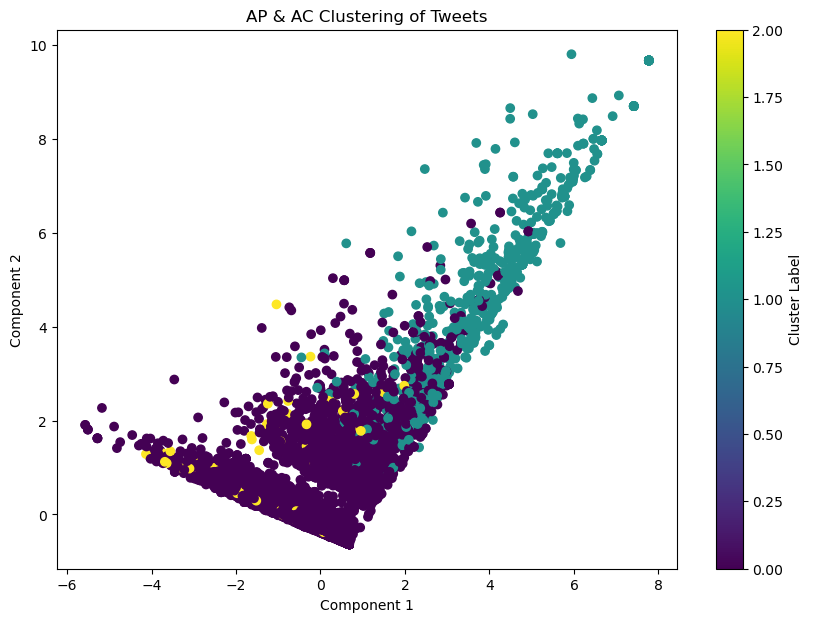

In [7]:
# Plot the KMeans results
plt.figure(figsize=(10, 7))
plt.scatter(tfidf_reduced_scaled[:, 1], tfidf_reduced_scaled[:, 0], c=agg_labels, cmap='viridis', marker='o')
plt.title('AP & AC Clustering of Tweets')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [8]:
# Sentiment Analysis on Clusters
sia = SentimentIntensityAnalyzer()
cluster_texts = [df[df['agg_labels'] == i]['cleaned_text'].dropna() for i in range(len(set(agg_labels)))]
cluster_sentiments = [[sia.polarity_scores(text) for text in cluster] for cluster in cluster_texts]

In [9]:
# Calculating and ploting the average sentiment scores
cluster_avg_sentiments = []
for cluster in cluster_sentiments:
    if cluster:  # Checking if the cluster is not empty
        avg_sentiment = {key: sum(score[key] for score in cluster) / len(cluster) for key in cluster[0].keys()}
        cluster_avg_sentiments.append(avg_sentiment)

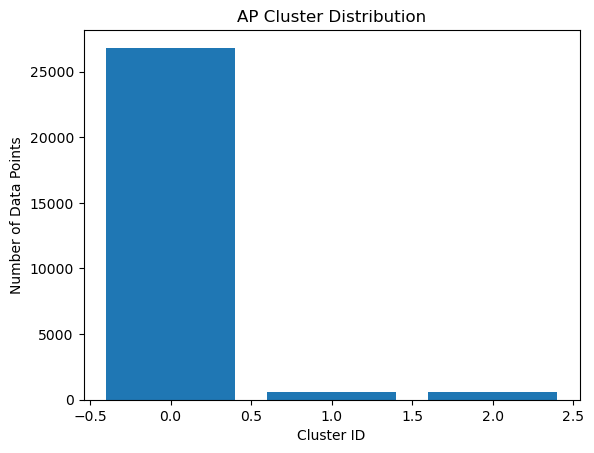

In [10]:
# Bar graph of cluster distribution
plt.bar(range(len(set(df['agg_labels']))), df['agg_labels'].value_counts())
plt.xlabel('Cluster ID')
plt.ylabel('Number of Data Points')
plt.title('AP Cluster Distribution')
plt.show()

In [22]:
# Print 5 sample texts and their sentiments from each cluster
for i, cluster in enumerate(cluster_sentiments):
    print(f"Cluster {i+1}:")
    for sentiment in cluster[-2:]:  # Print only the first 5 sentiments
        index = cluster.index(sentiment)
        text = cluster_texts[i].iloc[index]
        print(f"Text: {text}")
        print(f"Sentiment: {sentiment}")
        print("----------")
    print("==========")

Cluster 1:
Text: id responded going
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----------
Text: failed inspection know pass wooven woantitip bracket sold woven worse taxes
Sentiment: {'neg': 0.416, 'neu': 0.584, 'pos': 0.0, 'compound': -0.7506}
----------
Cluster 2:
Text: happy mothers day mums
Sentiment: {'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}
----------
Text: happy mothers day mothers world
Sentiment: {'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.5719}
----------
Cluster 3:
Text: watching thankyouobama u make wan na remix using sweet sable old times sake beat unexpected
Sentiment: {'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.4588}
----------
Text: wan na sue electoral college someone isi asked could class action u r legal eaglecan
Sentiment: {'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'compound': 0.128}
----------


In [12]:
# CLUSTER ANALYSIS
cluster_texts = [df[df['agg_labels'] == i]['cleaned_text'].dropna() for i in range(3)]
cluster_sentiments = [[sia.polarity_scores(text) for text in cluster] for cluster in cluster_texts]

cluster_avg_sentiments = []
for cluster in cluster_sentiments:
    if cluster:  # Check if the cluster is not empty
        avg_sentiment = {key: sum(score[key] for score in cluster) / len(cluster) for key in cluster[0].keys()}
        cluster_avg_sentiments.append(avg_sentiment)
    else:
        cluster_avg_sentiments.append({})  # Append an empty dictionary for empty clusters

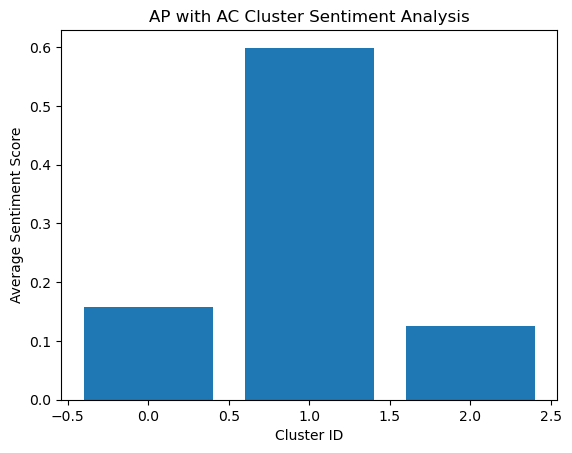

In [13]:

# Bar plot
plt.bar([i for i, cluster in enumerate(cluster_avg_sentiments) if 'compound' in cluster], [cluster['compound'] for cluster in cluster_avg_sentiments if 'compound' in cluster])
plt.xlabel('Cluster ID')
plt.ylabel('Average Sentiment Score')
plt.title('AP with AC Cluster Sentiment Analysis')
plt.show()

In [14]:
# Get the texts for each cluster
cluster_texts = [df[df['agg_labels'] == i]['cleaned_text'].dropna() for i in range(3)]

# Get the sentiment scores for each text in each cluster
cluster_sentiments = [[sia.polarity_scores(text) for text in cluster] for cluster in cluster_texts]

# Print Cluster 1 texts and sentiments
print("Cluster 1: NEGATIVE")
for text, sentiment in zip(cluster_texts[0][:2], cluster_sentiments[0][:2]):
    print(f"Text: {text}\nSentiment: {sentiment}\n----------")
print("================================================================================")

# Print Cluster 2 texts and sentiments
print("Cluster 2: NEUTRAL")
for text, sentiment in zip(cluster_texts[1][:2], cluster_sentiments[1][:2]):
    print(f"Text: {text}\nSentiment: {sentiment}\n----------")
print("================================================================================")

# Print Cluster 3 texts and sentiments
print("Cluster 3: POSITIVE")
for text, sentiment in zip(cluster_texts[2][:2], cluster_sentiments[2][:2]):
    print(f"Text: {text}\nSentiment: {sentiment}\n----------")
print("================================================================================")


Cluster 1: NEGATIVE
Text: id responded going
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----------
Text: sooo sad miss san diego
Sentiment: {'neg': 0.61, 'neu': 0.39, 'pos': 0.0, 'compound': -0.5719}
----------
Cluster 2: NEUTRAL
Text: happy mothers day mums
Sentiment: {'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}
----------
Text: happy mothers day moms
Sentiment: {'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}
----------
Cluster 3: POSITIVE
Text: much love hopeful reckon chances minimal p im never gon na get cake stuff
Sentiment: {'neg': 0.0, 'neu': 0.518, 'pos': 0.482, 'compound': 0.8519}
----------
Text: back home gon na miss every one
Sentiment: {'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'compound': -0.1531}
----------


In [15]:
# Get the texts for each cluster
cluster_texts = [df[df['agg_labels'] == i]['cleaned_text'].dropna() for i in range(3)]

# Get the sentiment scores for each text in each cluster
cluster_sentiments = [[sia.polarity_scores(text) for text in cluster] for cluster in cluster_texts]

# Get the negative texts (neg >= 0.5)
negative_texts = [text for cluster, sentiments in zip(cluster_texts, cluster_sentiments) for text, sentiment in zip(cluster, sentiments) if sentiment['neg'] >= 0.5]

# Get the neutral texts (neu >= 0.5)
neutral_texts = [text for cluster, sentiments in zip(cluster_texts, cluster_sentiments) for text, sentiment in zip(cluster, sentiments) if sentiment['neu'] >= 0.5]

# Get the positive texts (pos >= 0.5)
positive_texts = [text for cluster, sentiments in zip(cluster_texts, cluster_sentiments) for text, sentiment in zip(cluster, sentiments) if sentiment['pos'] >= 0.5]

In [16]:
# Print only the first 2 texts for each cluster

for text in negative_texts[:2]:
    print(f"Text: {text}\nSentiment: Negative\n----------")
print("======================================================")


for text in neutral_texts[:2]:
    print(f"Text: {text}\nSentiment: Neutral\n----------")
print("======================================================")


for text in positive_texts[:2]:
    print(f"Text: {text}\nSentiment: Positive\n----------")
print("======================================================")

Text: sooo sad miss san diego
Sentiment: Negative
----------
Text: boss bullying
Sentiment: Negative
----------
Text: id responded going
Sentiment: Neutral
----------
Text: sons couldnt put releases already bought
Sentiment: Neutral
----------
Text: feedings baby fun smiles coos
Sentiment: Positive
----------
Text: really really like song love story taylor swift
Sentiment: Positive
----------


In [17]:
# FOR FURTHER USE AND INSPECTION
with open('cluster_texts.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write the header
    writer.writerow(['Text', 'agg_Label', 'Cluster', 'Predicted Sentiment', 'Real Sentiment'])
    
    # Write the cluster texts with labels, cluster, predicted sentiment, and real sentiment
    for i, cluster in enumerate(cluster_texts):
        for text, sentiment in zip(cluster, cluster_sentiments[i]):
            predicted_sentiment = 'Negative' if i == 0 else 'Neutral' if i == 1 else 'Positive'
            real_sentiment = 'Negative' if sentiment['neg'] >= 0.5 else 'Neutral' if sentiment['neu'] >= 0.5 else 'Positive'
            writer.writerow([text, df['agg_labels'].iloc[i], f'Cluster {i+1}', predicted_sentiment, real_sentiment])